https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html

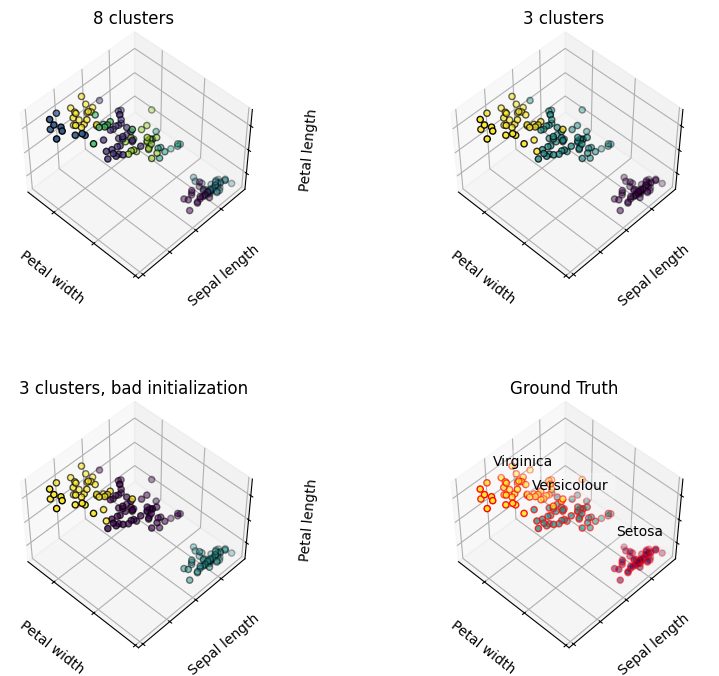

In [5]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets
from sklearn.cluster import KMeans

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=300, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="r")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.250, hspace=0.50)
plt.show()

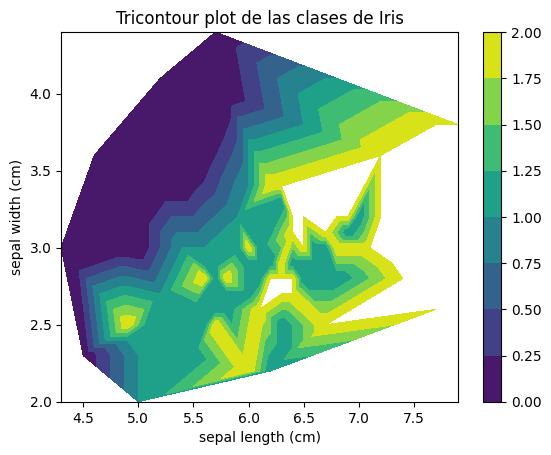

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.tri import Triangulation
from scipy.interpolate import griddata

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomar solo las dos primeras características

# Crear la triangulación
tri = Triangulation(X[:, 0], X[:, 1])

# Crear la malla para el tricontour
xi, yi = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Crear el tricontour
zi = griddata((X[:, 0], X[:, 1]), iris.target, (xi, yi), method='linear')

plt.tricontourf(tri, iris.target)
plt.colorbar()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Tricontour plot de las clases de Iris')
plt.show()

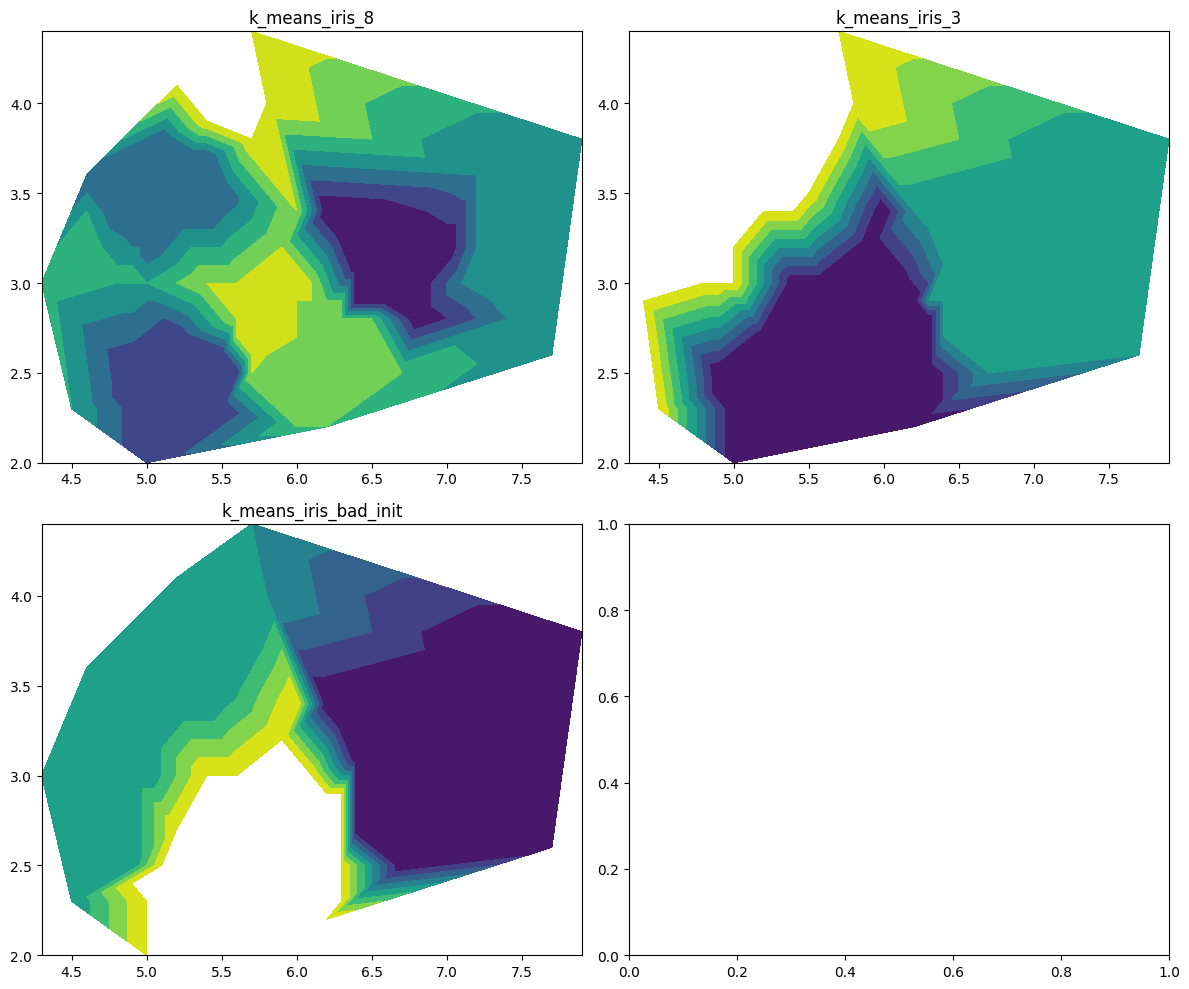

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.tri import Triangulation
from scipy.interpolate import griddata
from sklearn.cluster import KMeans

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomar solo las dos primeras características

# Estimadores
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()
for idx, ((name, est), ax) in enumerate(zip(estimators, axs)):
    est.fit(X)
    labels = est.labels_

    # Crear la triangulación
    tri = Triangulation(X[:, 0], X[:, 1])

    # Crear la malla para el tricontour
    xi, yi = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                        np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    # Crear el tricontour
    zi = griddata((X[:, 0], X[:, 1]), labels, (xi, yi), method='linear')

    ax.tricontourf(tri, labels)
    ax.set_title(name)

plt.tight_layout()
plt.show()

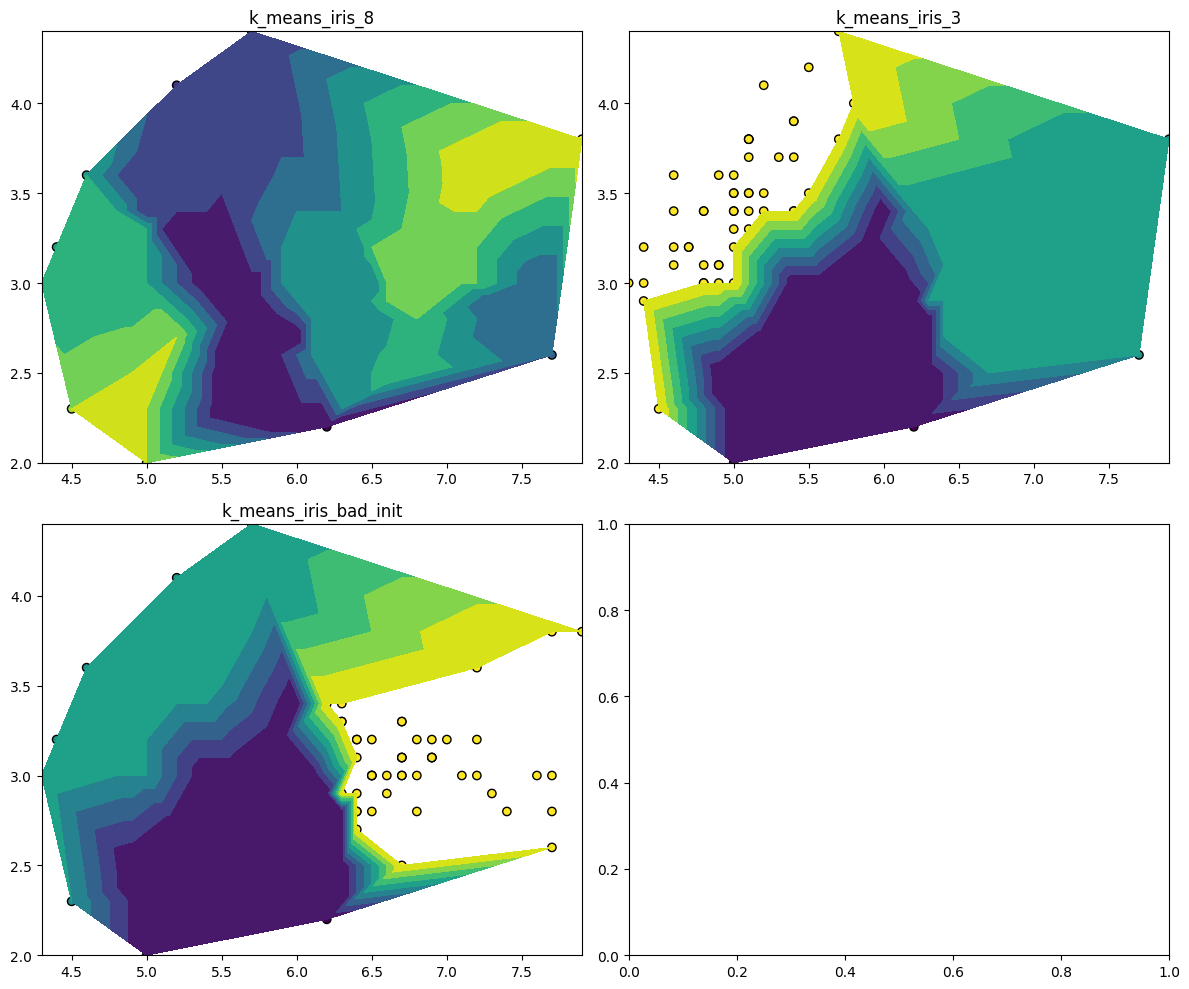

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib.tri import Triangulation
from scipy.interpolate import griddata
from sklearn.cluster import KMeans

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Tomar solo las dos primeras características

# Estimadores
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=300, init="random")),
]

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()
for idx, ((name, est), ax) in enumerate(zip(estimators, axs)):
    est.fit(X)
    labels = est.labels_

    # Scatter plot de los datos originales
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')

    # Crear la triangulación
    tri = Triangulation(X[:, 0], X[:, 1])

    # Crear la malla para el tricontour
    xi, yi = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                        np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    # Crear el tricontour
    zi = griddata((X[:, 0], X[:, 1]), labels, (xi, yi), method='linear')

    ax.tricontourf(tri, labels, cmap='viridis')
    ax.set_title(name)

plt.tight_layout()
plt.show()